In [1]:
import xgboost as xgb
import pandas as pd
import operator
from matplotlib import pylab as plt
from pylab import *
from imblearn.over_sampling import RandomOverSampler

df=pd.read_csv("icd10_Oct_7_flag.csv",encoding="gbk")
df.head()

,Unnamed: 0,eid,p41270,ALT,Albumin,Alkaline phosphatase,ApoA,ApoB,AST,C-reactive protein,...,SHBG,Sodium in urine,Testosterone,Total bilirubin,Total protein,Triglycerides,Urate,Urea,VD,flag
0,0,5155904,R87.6 Abnormal cytological findings|eczema/der...,11.61,44.62,58.3,1.612,0.776,18.0,1.81,...,75.27,32.5,0.877,7.18,71.28,1.677,281.6,4.84,109.0,0
1,1,5551888,E11.9 Without complications|E78.0 Pure hyperch...,23.24,44.45,78.5,1.397,1.022,25.1,0.59,...,23.27,123.9,15.640,9.15,76.82,0.803,334.1,3.05,39.4,0
2,2,4051692,D50.8 Other iron deficiency anaemias|F05.9 Del...,22.18,45.65,111.4,1.496,1.140,26.7,2.12,...,54.07,31.7,0.687,5.99,72.55,2.006,220.6,4.66,46.8,0
3,3,2293266,J32.8 Other chronic sinusitis|J33.9 Nasal poly...,24.61,41.70,110.3,1.142,0.799,27.8,5.15,...,26.26,179.3,8.990,8.90,70.65,1.769,376.7,3.89,22.2,0
4,4,3062055,K80.2 Calculus of gallbladder without cholecys...,28.28,45.62,69.3,1.324,1.231,64.9,2.31,...,32.42,107.4,9.275,33.14,69.07,2.656,331.1,9.26,39.6,0


In [2]:
df.isnull().sum()

Unnamed: 0                    0
eid                           0
p41270                        0
ALT                       31351
Albumin                   68624
Alkaline phosphatase      31169
ApoA                      71052
ApoB                      33453
AST                       32879
C-reactive protein        32161
Ca                        68760
Cholestero                31182
Creatinine                31407
Creatinine in urine       17233
Cystatin C                31211
Direct bilirubin          98798
γ-glutamyltransferase     31423
Glucose                   69111
HbA1c                     33999
HDL cholesterol           68809
IGF-1                     33605
LDL cholesterol          364101
Lipoprotein A            120426
Microalbumin in urine    329346
Phosphate                 69416
Potassium in urine        18191
SHBG                      72660
Sodium in urine           18233
Testosterone              74011
Total bilirubin           33110
Total protein             69067
Triglyce

In [3]:
leng=len(df["eid"])
df.dropna(axis=1,thresh=1*leng/3,inplace=True)
df.head()

,Unnamed: 0,eid,p41270,ALT,Albumin,Alkaline phosphatase,ApoA,ApoB,AST,C-reactive protein,...,SHBG,Sodium in urine,Testosterone,Total bilirubin,Total protein,Triglycerides,Urate,Urea,VD,flag
0,0,5155904,R87.6 Abnormal cytological findings|eczema/der...,11.61,44.62,58.3,1.612,0.776,18.0,1.81,...,75.27,32.5,0.877,7.18,71.28,1.677,281.6,4.84,109.0,0
1,1,5551888,E11.9 Without complications|E78.0 Pure hyperch...,23.24,44.45,78.5,1.397,1.022,25.1,0.59,...,23.27,123.9,15.640,9.15,76.82,0.803,334.1,3.05,39.4,0
2,2,4051692,D50.8 Other iron deficiency anaemias|F05.9 Del...,22.18,45.65,111.4,1.496,1.140,26.7,2.12,...,54.07,31.7,0.687,5.99,72.55,2.006,220.6,4.66,46.8,0
3,3,2293266,J32.8 Other chronic sinusitis|J33.9 Nasal poly...,24.61,41.70,110.3,1.142,0.799,27.8,5.15,...,26.26,179.3,8.990,8.90,70.65,1.769,376.7,3.89,22.2,0
4,4,3062055,K80.2 Calculus of gallbladder without cholecys...,28.28,45.62,69.3,1.324,1.231,64.9,2.31,...,32.42,107.4,9.275,33.14,69.07,2.656,331.1,9.26,39.6,0


In [4]:
data=df.iloc[:,3:33]
label=df["flag"]

col=data.columns
col

Index(['ALT', 'Albumin', 'Alkaline phosphatase', 'ApoA', 'ApoB', 'AST',
       'C-reactive protein', 'Ca', 'Cholestero', 'Creatinine',
       'Creatinine in urine', 'Cystatin C', 'Direct bilirubin',
       'γ-glutamyltransferase', 'Glucose', 'HbA1c', 'HDL cholesterol', 'IGF-1',
       'Lipoprotein A', 'Phosphate', 'Potassium in urine', 'SHBG',
       'Sodium in urine', 'Testosterone', 'Total bilirubin', 'Total protein',
       'Triglycerides', 'Urate', 'Urea', 'VD'],
      dtype='object')

In [5]:
for s in col:
    data[s].fillna(data[s].mean(),inplace=True)

In [6]:
data.isnull().sum()

ALT                      0
Albumin                  0
Alkaline phosphatase     0
ApoA                     0
ApoB                     0
AST                      0
C-reactive protein       0
Ca                       0
Cholestero               0
Creatinine               0
Creatinine in urine      0
Cystatin C               0
Direct bilirubin         0
γ-glutamyltransferase    0
Glucose                  0
HbA1c                    0
HDL cholesterol          0
IGF-1                    0
Lipoprotein A            0
Phosphate                0
Potassium in urine       0
SHBG                     0
Sodium in urine          0
Testosterone             0
Total bilirubin          0
Total protein            0
Triglycerides            0
Urate                    0
Urea                     0
VD                       0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, random_state=0)

In [8]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train_x, train_y)

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [10]:
num_round = 100
model = XGBClassifier(max_depth=2, learning_rate=0.1,n_estimators=num_round, verbosity=0, objective='binary:logistic')
model.fit(X_resampled, y_resampled)
# feature importance
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X_resampled, y_resampled, cv=kfold)
print(results)
print("CV Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.70058757 0.70116932 0.69850781 0.69965677 0.70204194 0.69917682
 0.70679775 0.70173653 0.70205215 0.70072865]
CV Accuracy: 70.12% (0.22%)


In [49]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'n_estimators':[i for i in range(100,300,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(max_depth=5,min_child_weight=1,subsample=0.85,colsample_bytree=0.55, gamma=0.0,learning_rate=0.1,n_estimators=num_round, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(train_x,train_y)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 150}, 0.7753734051488592)

In [50]:

param_test2 = {
 'max_depth':list(range(3,7,1)),
 'min_child_weight':list(range(1,3,1))
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(max_depth=2, learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(train_x,train_y)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 2}, 0.7751955937858679)

In [52]:
param_test3 = {
 'min_child_weight':list(range(2,5,1))
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2, learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(train_x,train_y)
gsearch3.best_params_, gsearch3.best_score_

({'min_child_weight': 2}, 0.7751955937858679)

In [53]:
param_test4 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2, learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(train_x,train_y)
gsearch4.best_params_, gsearch4.best_score_

({'gamma': 0.2}, 0.7751987408645071)

In [54]:
param_test4 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2,gamma=0.2,learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(train_x,train_y)
gsearch4.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.75, 'subsample': 0.8}, 0.7753734051488592)

In [55]:
param_test5 = {
 'colsample_bytree':[i/100.0 for i in range(50,75,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2,subsample=0.8, gamma=0.2,learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(train_x,train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.2, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.55, 0.6, 0.65, 0.7]},
             scoring='roc_auc')

In [56]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.65}, 0.7754925416594288)

In [59]:
param_test6 = {
 'verbosity':[i for i in [0,1,2,3]]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2,subsample=0.8,colsample_bytree=0.65, gamma=0.2,learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(train_x,train_y)
gsearch6.best_params_, gsearch6.best_score_

({'verbosity': 0}, 0.7754925416594288)

In [60]:
param_test7 = {
 'learning_rate':[i for i in [1e-3,1e-2,1e-1]]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(max_depth=4,min_child_weight=2,subsample=0.8,colsample_bytree=0.65, gamma=0.2,learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic'), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(train_x,train_y)
gsearch7.best_params_, gsearch7.best_score_

({'learning_rate': 0.1}, 0.7754925416594288)

In [61]:
gsearch7.cv_results_

{'mean_fit_time': array([22.38394027, 22.86231432, 21.45158882]),
 'std_fit_time': array([0.08859683, 0.17103815, 1.77320031]),
 'mean_score_time': array([0.10292473, 0.10395374, 0.09733968]),
 'std_score_time': array([0.00677597, 0.00839504, 0.02141468]),
 'param_learning_rate': masked_array(data=[0.001, 0.01, 0.1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.001},
  {'learning_rate': 0.01},
  {'learning_rate': 0.1}],
 'split0_test_score': array([0.73563149, 0.7397923 , 0.7656793 ]),
 'split1_test_score': array([0.75333912, 0.75840266, 0.78073881]),
 'split2_test_score': array([0.73213076, 0.73708934, 0.76873667]),
 'split3_test_score': array([0.7549181 , 0.75965283, 0.78444151]),
 'split4_test_score': array([0.74461165, 0.74979222, 0.77786642]),
 'mean_test_score': array([0.74412623, 0.74894587, 0.77549254]),
 'std_test_score': array([0.00913925, 0.00926446, 0.007144  ]),
 'rank_test_score': array([3, 2

In [11]:
f1=cross_val_score(model, X_resampled, y_resampled, scoring="f1",cv=kfold)

In [12]:
print("F1-Score: %.2f%% (%.2f%%)" % (f1.mean()*100, f1.std()*100))

F1-Score: 69.81% (0.25%)


In [13]:
model.score(test_x,test_y)

0.7106300701946114

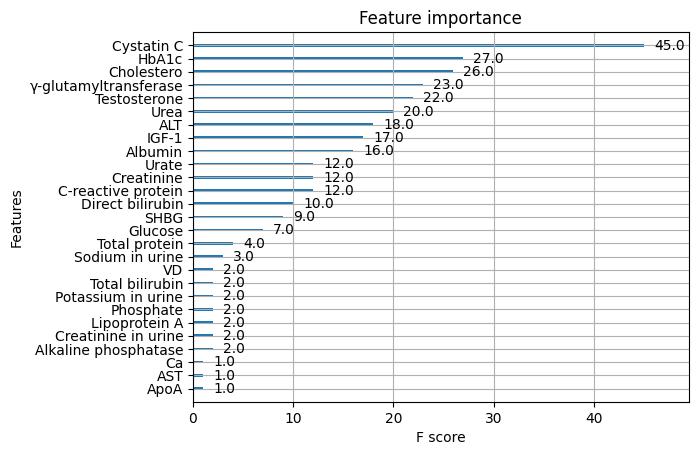

In [14]:
from matplotlib import pyplot
from xgboost import plot_importance
# plot
plot_importance(model)
pyplot.show()

In [15]:
from sklearn.metrics import mean_squared_error as MSE
MSE(test_y,model.predict(test_x))

0.2893699298053886

In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
y_pred=model.predict(test_x)
recall=recall_score(test_y,y_pred)
recall

0.6637830254851531